In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Data Collection & Data Loading

In [16]:
file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'
download_url = f'https://drive.google.com/uc?id={file_id}'
 
data = pd.read_csv(download_url)
 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Cleaning

In [17]:
print("\nInformasi Dataset :" )
data.info()



Informasi Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [18]:
data.describe(include="all")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [19]:
print(data.isnull().sum())

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [20]:
data = data.drop(columns=["RowNumber", "CustomerId", "Surname"])
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis (EDA) 

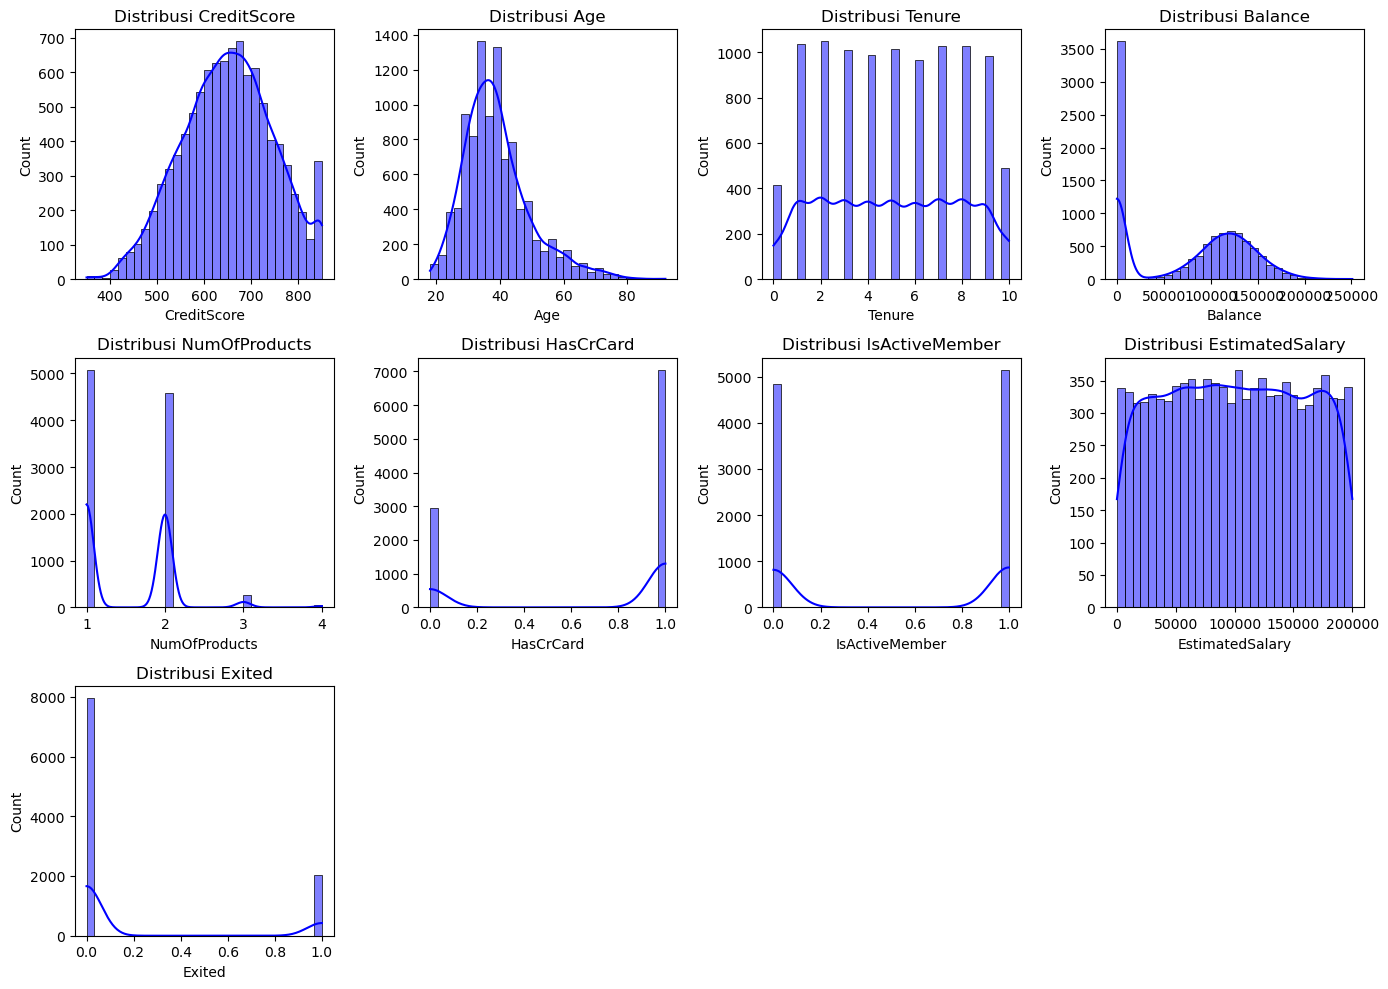

In [21]:
num_features = data.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))

for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    
plt.tight_layout()
plt.show()

/tmp/ipykernel_3342/3943939793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')
/tmp/ipykernel_3342/3943939793.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[column], palette='viridis')


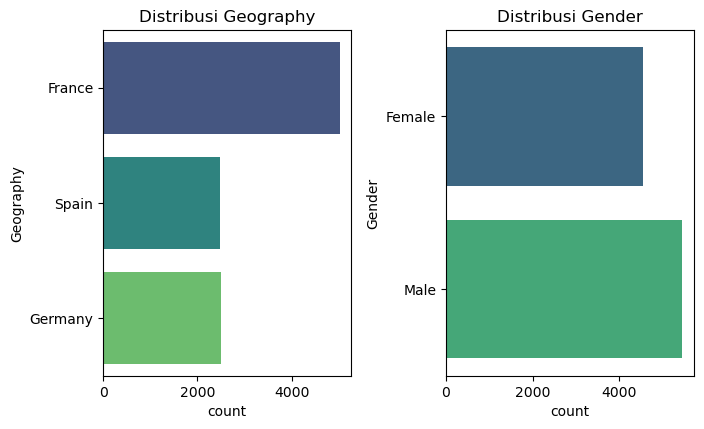

In [22]:
# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))

for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
    
plt.tight_layout()
plt.show()

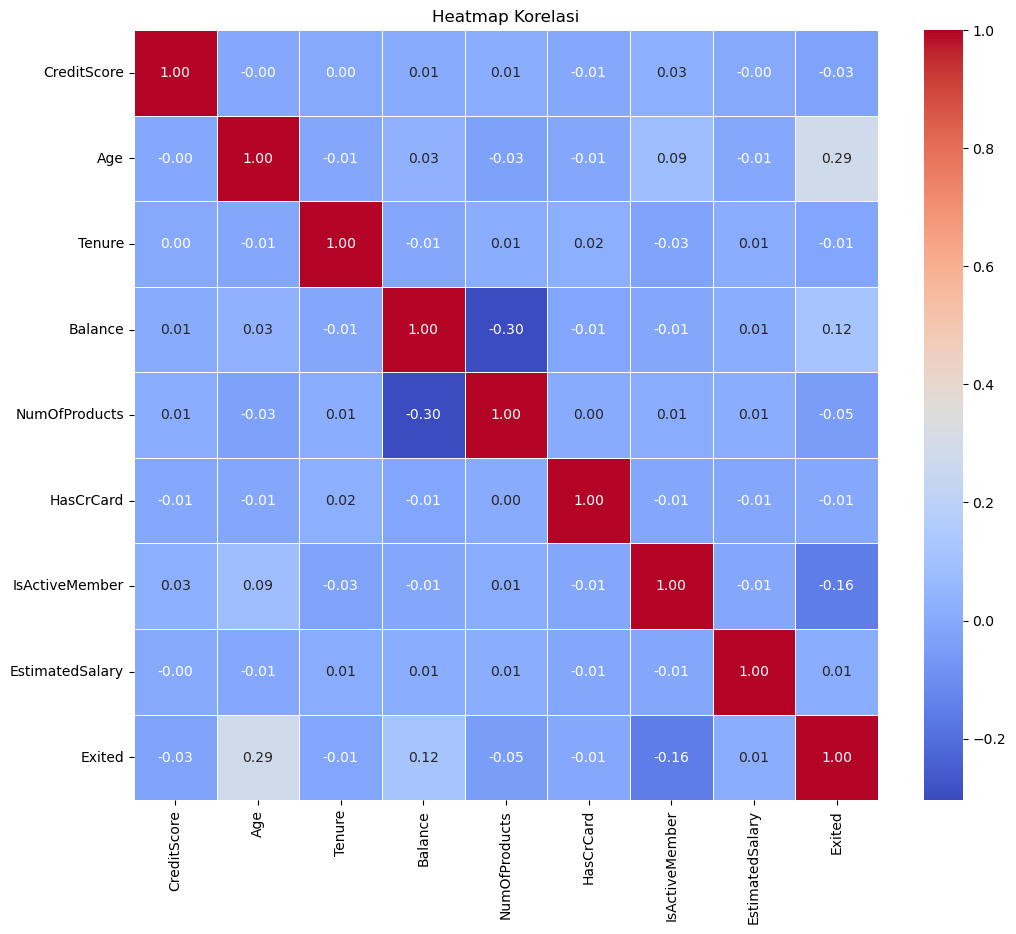

In [23]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

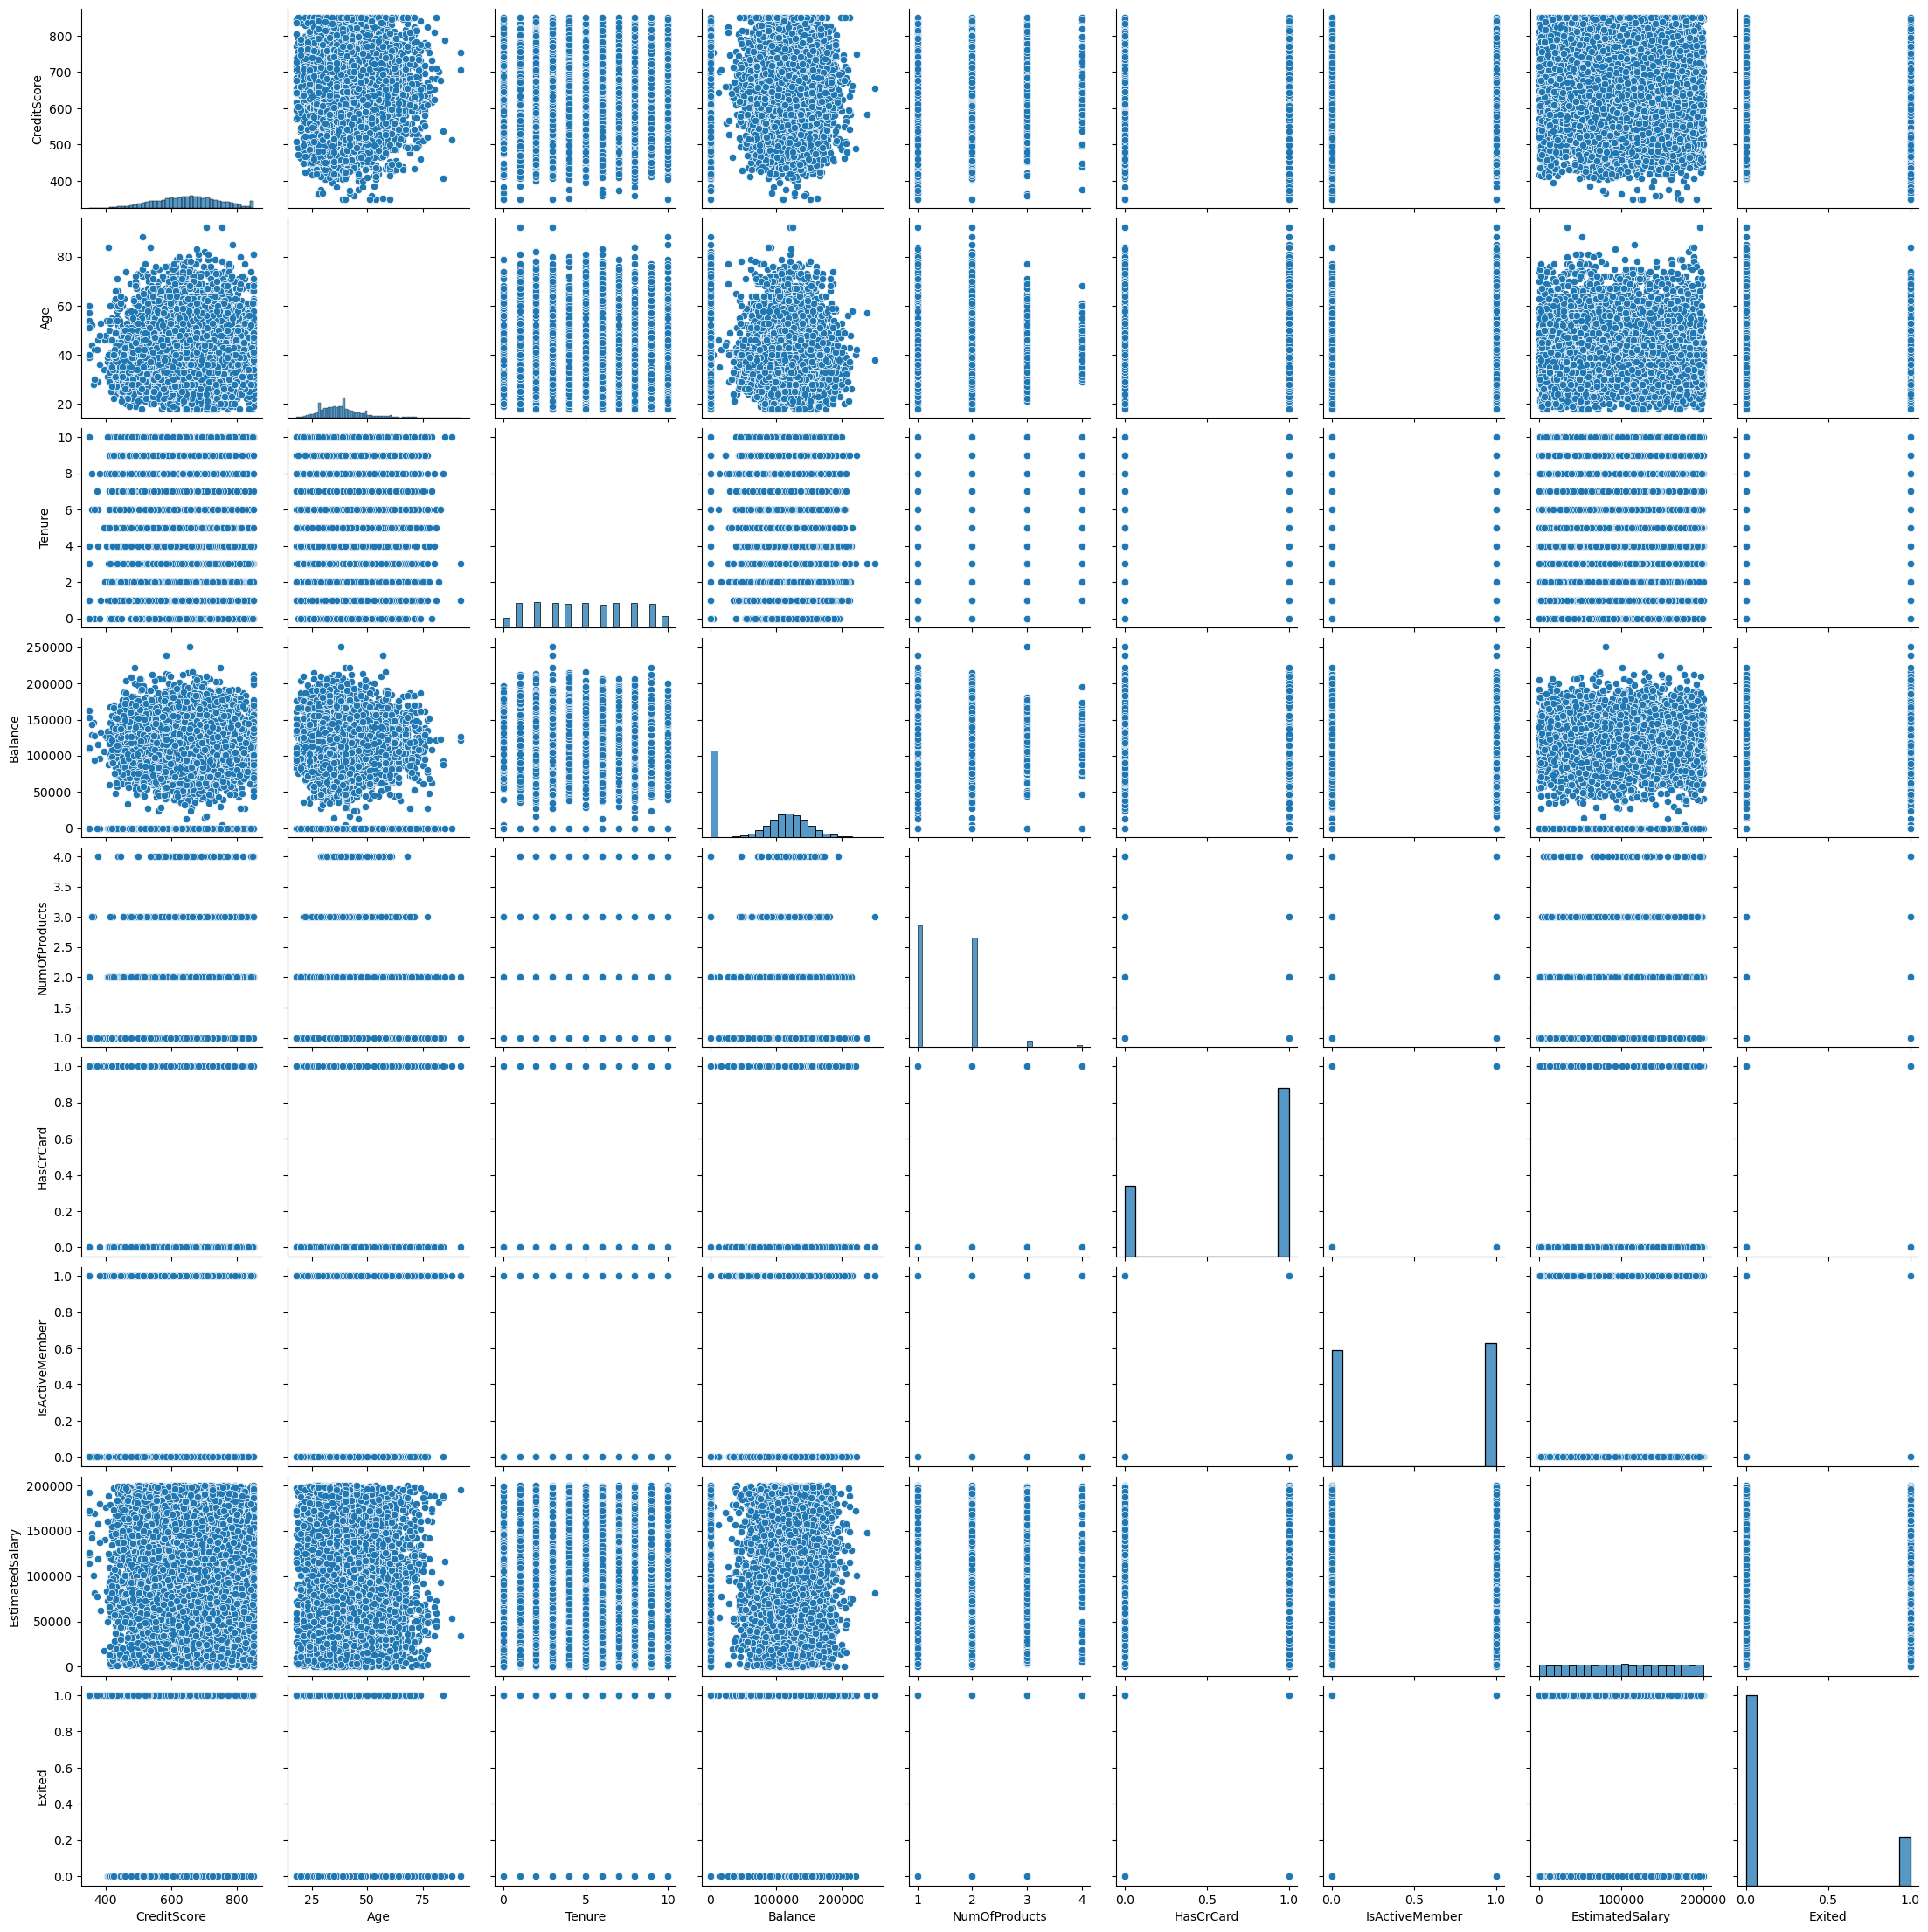

In [24]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

/tmp/ipykernel_3342/475290074.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Exited', data=data, palette='viridis')


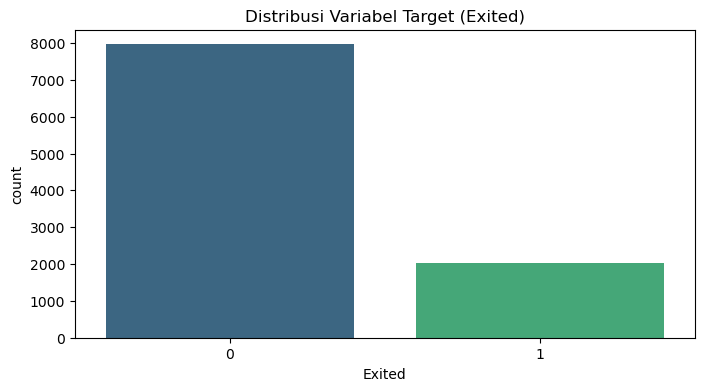

In [25]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Exited', data=data, palette='viridis')
plt.title('Distribusi Variabel Target (Exited)')
plt.show()

# Label Encoder

In [26]:
label_encoder = LabelEncoder()
 
categorical_columns = ['Geography', 'Gender']
 
for column in categorical_columns:
    data[column] = label_encoder.fit_transform(data[column])
 
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


# Data Spliting

In [27]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
 
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['Exited'])
y = data['Exited']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 10), y_train=(8000,)
Test set shape: X_test=(2000, 10), y_test=(2000,)


# Pelatihan Model

In [28]:
# Bagian 1: Pelatihan Model
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


# Evaluasi Model

In [30]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results
 
# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test)
}
 
# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
 
# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })
 
# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)
 
# Tampilkan DataFrame
print(summary_df)

                          Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN)    0.8240   0.595349  0.325700  0.421053
1            Decision Tree (DT)    0.7820   0.452539  0.521628  0.484634
2            Random Forest (RF)    0.8700   0.785408  0.465649  0.584665
3  Support Vector Machine (SVM)    0.8530   0.827815  0.318066  0.459559
4              Naive Bayes (NB)    0.8285   0.681159  0.239186  0.354049


# Rangkuman Hasil
# Evaluasi Model Klasifikasi Churn

Berikut ini adalah ringkasan performa beberapa model klasifikasi pada dataset churn:

| Model                  | Akurasi | Precision | Recall  | F1-Score | Keterangan                                                                 |
|------------------------|---------|-----------|--------|----------|----------------------------------------------------------------------------|
| **K-Nearest Neighbors (KNN)** | 82.40%  | 59.53%   | 32.57% | 42.11%   | Precision cukup tinggi, menunjukkan prediksi churn yang benar cenderung akurat, tetapi recall rendah sehingga banyak churn yang terlewat. |
| **Decision Tree**       | 78.00%  | 44.74%   | 50.89% | 47.62%   | Recall lebih baik dari KNN, namun precision rendah, sehingga lebih banyak false positives. |
| **Random Forest**       | 86.95%  | 78.45%   | 46.31% | 58.24%   | Memiliki performa terbaik di semua metrik. Precision tinggi, recall moderat, F1-Score seimbang. Kandidat utama untuk implementasi lebih lanjut. |
| **Support Vector Machine (SVM)** | 85.30%  | 82.78%   | 31.81% | 45.96%   | Precision sangat tinggi, efektif mengklasifikasikan churn. Recall rendah, sehingga banyak churn yang terlewat. |
| **Naive Bayes**         | 82.85%  | 68.12%   | 23.92% | 35.40%   | Precision cukup tinggi, tetapi recall sangat rendah, kurang efektif mendeteksi churn. |

## Kesimpulan

- **Random Forest** adalah model terbaik secara keseluruhan, unggul dalam akurasi, precision, recall, dan F1-Score. Cocok untuk implementasi lebih lanjut.
- **SVM** menunjukkan precision tinggi, namun sering melewatkan pelanggan churn.
- **KNN** dan **Naive Bayes** memiliki akurasi dan precision baik, tetapi recall rendah sehingga banyak churn tidak terdeteksi.
- **Decision Tree** memberikan recall yang lebih baik, tapi akurasi dan precision lebih rendah dibandingkan model lain.
